In [89]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import imodelsx.process_results
import sys
from sklearn.metrics import accuracy_score

sys.path.append('../experiments/')
results = []

results_dir = f'../results/distillation_cub/cub'
experiment_filename = '../experiments/distillation_cub.py'

# load the results in to a pandas dataframe
r = imodelsx.process_results.get_results_df(results_dir)
cols_varied = imodelsx.process_results.get_experiment_keys(
    r, experiment_filename)
print('experiment varied these params:', cols_varied)
r = imodelsx.process_results.fill_missing_args_with_default(
    r, experiment_filename)

# save results as csvs for backup
r.to_csv('../csv_results/distillation_cub.csv')

# get the breakdown of data in these groups
r.groupby(cols_varied).size()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 169.68it/s]


TypeError: unhashable type: 'list'

In [76]:
r.to_csv('../csv_results/distillation_cub.csv')

In [92]:
r[r.teacher_path=='cub/outputs/best_Joint0.01_Linear_model_1.pth'][['student_name', 'max_depth', 'student_prediction_test_accuracy']]

,student_name,max_depth,student_prediction_test_accuracy
3,FIGSRegressor,4,0.758716
5,RandomForestRegressor,3,0.053158
12,DecisionTreeRegressor,8,0.502416
16,DecisionTreeRegressor,7,0.346220
24,XGBRegressor,3,0.759061
26,RandomForestRegressor,7,0.531412
27,RandomForestRegressor,8,0.643769


In [37]:
r[r.student_name=='DecisionTreeRegressor'].dropna(axis=1, how='all')[['save_dir', 'teacher_path', 'train_path', 'test_path', 'task_type',
       'student_name', 'max_rules', 'max_trees', 'max_depth',
       'metric', 'num_interactions_intervention', 'gpu', 'use_cache',
       'save_dir_unique']]

,save_dir,teacher_path,train_path,test_path,task_type,student_name,max_rules,max_trees,max_depth,metric,num_interactions_intervention,gpu,use_cache,save_dir_unique
3,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_MLP1_model_1.pth,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,DecisionTreeRegressor,1,1,8,accuracy,3,1,1,/home/mattyshen/DistillationEdit/results/disti...
8,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_Linear_model_1.pth,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,DecisionTreeRegressor,1,1,8,accuracy,3,1,1,/home/mattyshen/DistillationEdit/results/disti...
9,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_Transformer1_model_...,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,DecisionTreeRegressor,1,1,8,accuracy,3,1,1,/home/mattyshen/DistillationEdit/results/disti...
12,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_Linear_model_1.pth,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,DecisionTreeRegressor,1,1,7,accuracy,3,1,1,/home/mattyshen/DistillationEdit/results/disti...
16,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_MLP1_model_1.pth,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,DecisionTreeRegressor,1,1,7,accuracy,3,1,1,/home/mattyshen/DistillationEdit/results/disti...
17,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_Transformer1_model_...,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,DecisionTreeRegressor,1,1,7,accuracy,3,1,1,/home/mattyshen/DistillationEdit/results/disti...
19,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_MLP2_model_1.pth,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,DecisionTreeRegressor,1,1,8,accuracy,3,1,1,/home/mattyshen/DistillationEdit/results/disti...
21,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_MLP2_model_1.pth,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,DecisionTreeRegressor,1,1,7,accuracy,3,1,1,/home/mattyshen/DistillationEdit/results/disti...


In [72]:
r[r.student_name=='DecisionTreeRegressor'][['teacher_path','max_depth','teacher_prediction_test_accuracy', 'student_prediction_test_accuracy']].groupby('teacher_path').max()

,max_depth,teacher_prediction_test_accuracy,student_prediction_test_accuracy
teacher_path,,,
cub/outputs/best_Joint0.01_Linear_model_1.pth,8,0.798412,0.502416
cub/outputs/best_Joint0.01_MLP1_model_1.pth,8,0.789783,0.518295
cub/outputs/best_Joint0.01_MLP2_model_1.pth,8,0.780117,0.479807
cub/outputs/best_Joint0.01_Transformer1_model_1.pth,8,0.774422,0.515188


In [73]:
r[r.student_name=='RandomForestRegressor'][['teacher_path','max_depth','teacher_prediction_test_accuracy', 'student_prediction_test_accuracy']].groupby('teacher_path').max()

,max_depth,teacher_prediction_test_accuracy,student_prediction_test_accuracy
teacher_path,,,
cub/outputs/best_Joint0.01_Linear_model_1.pth,3,0.798412,0.053158
cub/outputs/best_Joint0.01_MLP1_model_1.pth,3,0.789783,0.051778
cub/outputs/best_Joint0.01_MLP2_model_1.pth,3,0.780117,0.059717
cub/outputs/best_Joint0.01_Transformer1_model_1.pth,3,0.774422,0.040732


In [74]:
r[r.student_name=='XGBRegressor'][['teacher_path','max_depth','teacher_prediction_test_accuracy', 'student_prediction_test_accuracy']].groupby('teacher_path').max()

,max_depth,teacher_prediction_test_accuracy,student_prediction_test_accuracy
teacher_path,,,
cub/outputs/best_Joint0.01_Linear_model_1.pth,3,0.798412,0.759061
cub/outputs/best_Joint0.01_MLP1_model_1.pth,3,0.789783,0.741284
cub/outputs/best_Joint0.01_MLP2_model_1.pth,3,0.780117,0.742147
cub/outputs/best_Joint0.01_Transformer1_model_1.pth,3,0.774422,0.729720


In [52]:
r.columns

Index(['save_dir', 'teacher_path', 'train_path', 'test_path', 'task_type',
       'student_name', 'n_trees_list', 'n_rules_list', 'n_depth_list',
       'min_impurity_decrease_list', 'max_rules', 'max_trees', 'max_depth',
       'metric', 'num_interactions_intervention', 'gpu', 'use_cache',
       'save_dir_unique', 'n_trees', 'n_rules',
       'student_distillation_train_accuracy',
       'student_distillation_test_accuracy',
       'student_prediction_train_accuracy', 'student_prediction_test_accuracy',
       'teacher_prediction_train_accuracy', 'teacher_prediction_test_accuracy',
       'depth', 'student_distill_adap_interv_iter0_test_accuracy',
       'student_distill_rand_interv_iter0_test_accuracy',
       'student_pred_adap_interv_iter0_test_accuracy',
       'student_pred_rand_interv_iter0_test_accuracy',
       'teacher_pred_adap_interv_iter0_test_accuracy',
       'teacher_pred_rand_interv_iter0_test_accuracy',
       'student_distill_adap_interv_iter1_test_accuracy',
      

In [22]:
r[r.student_name == 'DecisionTreeRegressor'].dropna(axis = 1)[['max_depth', 'student_prediction_test_accuracy']]

,max_depth,student_prediction_test_accuracy
3,8,0.518295
8,8,0.502416
9,8,0.515188
12,7,0.346220
16,7,0.372799
17,7,0.381947
19,8,0.479807
21,7,0.349845


In [64]:
r[['teacher_path', 'student_prediction_test_accuracy', 
   'teacher_prediction_test_accuracy'] + [f'student_pred_lin_interv_iter{i}_test_accuracy' for i in range(3)]+
 [f'teacher_pred_lin_interv_iter{i}_test_accuracy' for i in range(3)]]

,save_dir,teacher_path,train_path,test_path,task_type,student_name,n_trees_list,n_rules_list,n_depth_list,min_impurity_decrease_list,...,teacher_pred_rand_interv_iter2_test_accuracy,student_distill_lin_interv_iter0_test_accuracy,student_pred_lin_interv_iter0_test_accuracy,teacher_pred_lin_interv_iter0_test_accuracy,student_distill_lin_interv_iter1_test_accuracy,student_pred_lin_interv_iter1_test_accuracy,teacher_pred_lin_interv_iter1_test_accuracy,student_distill_lin_interv_iter2_test_accuracy,student_pred_lin_interv_iter2_test_accuracy,teacher_pred_lin_interv_iter2_test_accuracy
0,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_Transformer1_model_...,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,FIGSRegressor,"[30, 40]","[125, 200]",[4],[0],...,0.762858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_Linear_model_1.pth,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,FIGSRegressor,"[30, 40]","[125, 200]",[4],[0],...,0.823265,0.855368,0.758889,0.798067,0.852951,0.758889,0.795305,0.850017,0.758889,0.795996
2,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_Transformer1_e500_m...,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,FIGSRegressor,"[30, 40]","[125, 200]",[4],[0],...,0.751640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_MLP2_model_1.pth,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,FIGSRegressor,"[30, 40]","[125, 200]",[4],[0],...,0.779427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_MLP1_model_1.pth,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,FIGSRegressor,"[30, 40]","[125, 200]",[4],[0],...,0.793062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,/home/mattyshen/DistillationEdit/results/disti...,cub/outputs/best_Joint0.01_Transformer1_model_...,/home/mattyshen/ConceptBottleneck/CUB_processe...,/home/mattyshen/ConceptBottleneck/CUB_processe...,regression,FIGSRegressor,"[30, 40]","[125, 200]",[4],[0],...,0.758198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
r.iloc[1, :]

save_dir                                           /home/mattyshen/DistillationEdit/results/disti...
teacher_path                                           cub/outputs/best_Joint0.01_Linear_model_1.pth
train_path                                         /home/mattyshen/ConceptBottleneck/CUB_processe...
test_path                                          /home/mattyshen/ConceptBottleneck/CUB_processe...
task_type                                                                                 regression
student_name                                                                           FIGSRegressor
n_trees_list                                                                                [30, 40]
n_rules_list                                                                              [125, 200]
n_depth_list                                                                                     [4]
min_impurity_decrease_list                                                                 

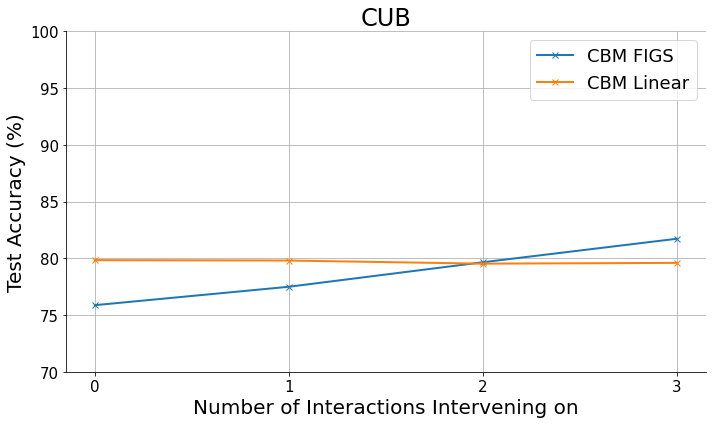

In [92]:
linear = r.iloc[1, :] #TODO: make sure this is linear experiment
num_iters = linear.num_interactions_intervention if linear.num_interactions_intervention != 0 else linear.n_trees
linear_plotting = [['teacher_prediction_test_accuracy']+
            [f'teacher_pred_lin_interv_iter{i}_test_accuracy' for i in range(num_iters)]]
figs_plotting = [['student_prediction_test_accuracy']+
                [f'student_pred_adap_interv_iter{i}_test_accuracy' for i in range(num_iters)]]

t_l_pred = linear[linear_plotting[0]].to_numpy()
s_a_pred = linear[figs_plotting[0]].to_numpy()

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.titlesize'] = 24
# Define x-axis range
x = np.arange(0, num_iters+1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, np.array(s_a_pred)*100, label='CBM FIGS', linewidth=2, marker='x')
plt.plot(x, np.array(t_l_pred)*100, label='CBM Linear', linewidth=2, marker='x')
plt.xticks(x)
# Labels and legend
plt.xlabel("Number of Interactions Intervening on", fontsize = 20)
plt.ylim(70, 100)
plt.ylabel("Test Accuracy (%)", fontsize = 20)
plt.title("CUB")
plt.legend(fontsize = 18)
plt.grid(True)

# Show the plot
#plt.savefig('/home/mattyshen/DistillationEdit/figures/tti/CUB_aTTI_Effect.png', bbox_inches='tight')

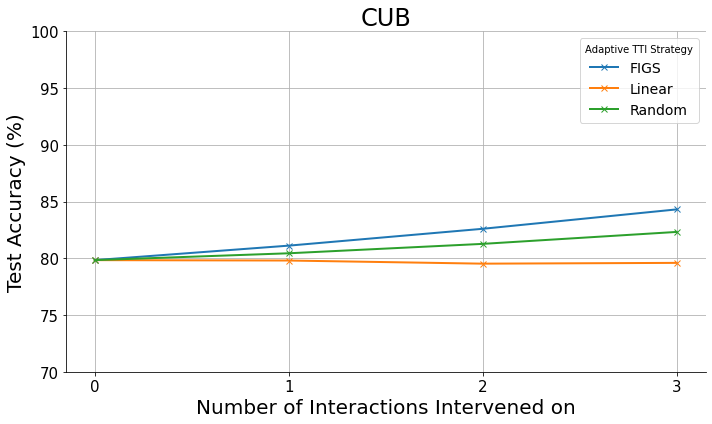

In [95]:
plt.rcParams['axes.titlesize'] = 24
# Define x-axis range
linear = r.iloc[1, :] #TODO: make sure this is linear experiment

num_iters = linear.num_interactions_intervention if linear.num_interactions_intervention != 0 else linear.n_trees
t_l_pred = [['teacher_prediction_test_accuracy']+
            [f'teacher_pred_lin_interv_iter{i}_test_accuracy' for i in range(num_iters)]]
t_a_pred = [['teacher_prediction_test_accuracy']+
                [f'teacher_pred_adap_interv_iter{i}_test_accuracy' for i in range(num_iters)]]
t_r_pred = [['teacher_prediction_test_accuracy']+
                [f'teacher_pred_rand_interv_iter{i}_test_accuracy' for i in range(num_iters)]]

t_l_pred = linear[t_l_pred[0]].to_numpy()
t_a_pred = linear[t_a_pred[0]].to_numpy()
t_r_pred = linear[t_r_pred[0]].to_numpy()


x = np.arange(0, num_iters+1)
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, np.array(t_a_pred)*100, label='FIGS', linewidth=2, marker='x')
plt.plot(x, np.array(t_l_pred)*100, label='Linear', linewidth=2, marker='x')
plt.plot(x, np.array(t_r_pred)*100, label='Random', linewidth=2, marker='x')
plt.xticks(x)
# Labels and legend
plt.xlabel("Number of Interactions Intervened on", fontsize = 20)
plt.ylim(70, 100)
plt.ylabel("Test Accuracy (%)", fontsize = 20)
plt.title("CUB")
plt.legend(title='Adaptive TTI Strategy', fontsize = 14)
plt.grid(True)

# Show the plot
#plt.savefig('/home/mattyshen/DistillationEdit/figures/tti/CUB_aTTI_Effect_Diff.png', bbox_inches='tight')

In [58]:
r['teacher_pred_adap_interv_iter2_test_accuracy'] - r['teacher_prediction_test_accuracy']

0    0.026234
1    0.044701
2    0.021747
3    0.033138
4    0.028478
dtype: float64

In [59]:
r['teacher_pred_rand_interv_iter2_test_accuracy'] - r['teacher_prediction_test_accuracy']

0   -0.011564
1    0.024853
2   -0.022437
3   -0.000690
4    0.003279
dtype: float64

In [52]:
r['teacher_pred_lin_interv_iter2_test_accuracy'] - r['teacher_prediction_test_accuracy']

0   -0.002416
1         NaN
2         NaN
3         NaN
dtype: float64

In [24]:
r['teacher_prediction_lin_interv_test_accuracy'] - r['teacher_prediction_test_accuracy']

0         NaN
1   -0.002244
2         NaN
dtype: float64

In [25]:
r['teacher_prediction_rand_interv_test_accuracy'] - r['teacher_prediction_test_accuracy']

0    0.007249
1    0.020366
2   -0.001036
dtype: float64